In [13]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math


In [14]:
img= cv.imread("datasetChido.png",0)

for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if img[x,y]<150:
            img[x,y]=0
        else:
            img[x,y]=255
            
cv.imshow("ventana",img)
cv.waitKey(0)
cv.destroyAllWindows()          
# lena_rgb=io(img)/255.0
# plt.imshow(lena_rgb)
# lena_rgb[:,:,2]=0
# lena_rgb=io.imread("lena.png")/255.0 # imread lee las imagenes con los pixeles codificados como enteros 


# plt.title("Lena_ sin canal azul")
# plt.imshow(lena_red_green)



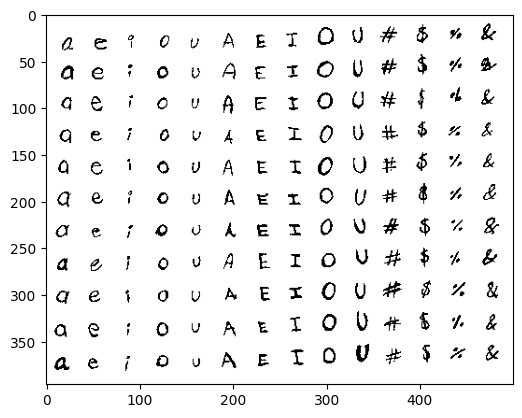

In [15]:
img = cv.imread("datasetChidoBin.png")
plt.imshow(img)


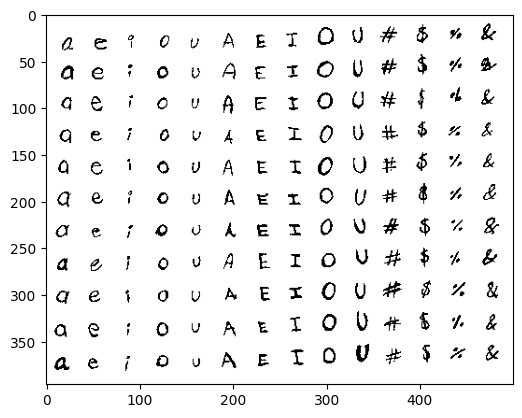

In [16]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)

# en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
data = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(data)


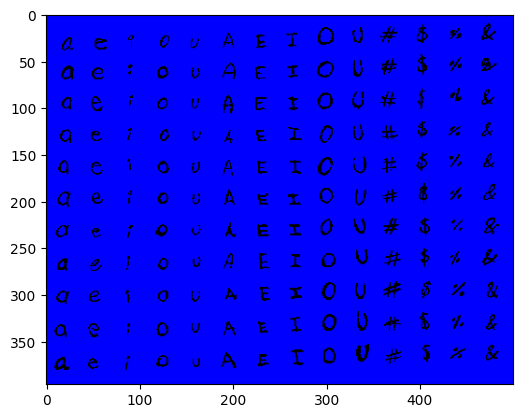

In [17]:
img_hsv = cv.cvtColor(data, cv.COLOR_RGB2HSV) 
plt.imshow(img_hsv)

In [18]:
# Elegimos el umbral de rojo en HSV
umbral_bajo = (0,0,0)
umbral_alto = (0,0,0)
# hacemos la mask y filtramos en la original
mask = cv.inRange(img_hsv, umbral_bajo, umbral_alto)
res = cv.bitwise_and(img, img, mask=mask)

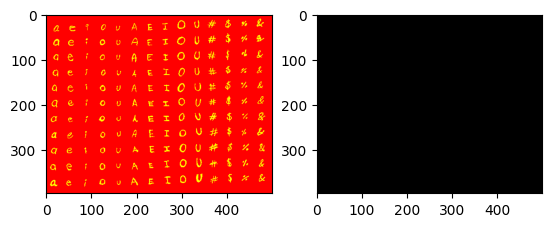

In [19]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="autumn")
plt.imsave("C:\jupyter\datasetChidoBinCmap.png",mask, cmap="autumn")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

In [ ]:
#identificar islas
img = cv.imread('datasetChidoBinCmap.png')

umbral_bajo = (20,60,60)
umbral_alto = (35,255,255)

# ub = (120,60,60)
# ua = (129,255,255)

img_hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
mask1 = cv.inRange(img_hsv,umbral_bajo,umbral_alto)
# mask2 = cv.inRange(img_hsv,ub,ua)
cv.imshow("letrasbien",mask1)
# cv.imshow("rojo2",mask2)
# mask = cv.add(mask1,mask2)

#res = cv.bitwise_and(img, img, mask=mask)

cv.imshow("Imagen",img)
cv.imshow("Imagen hsv",img_hsv)

# cv.imshow("islas sin fondo",res)


class Graph:

	def __init__(self, row, col, g):
		self.ROW = row
		self.COL = col
		self.graph = g

	def isSafe(self, i, j, visited):

		return (i >= 0 and i < self.ROW and
				j >= 0 and j < self.COL and
				not visited[i][j] and self.graph[i][j])


	def DFS(self, i, j, visited):
		rowNbr = [-1, -1, -1, 0, 0, 1, 1, 1]
		colNbr = [-1, 0, 1, -1, 1, -1, 0, 1]

		visited[i][j] = True


		for k in range(8):
			if self.isSafe(i + rowNbr[k], j + colNbr[k], visited):
				self.DFS(i + rowNbr[k], j + colNbr[k], visited)

	def countIslands(self):
		visited = [[False for j in range(self.COL)]for i in range(self.ROW)]
		count = 0
		for i in range(self.ROW):
			for j in range(self.COL):
				if visited[i][j] == False and self.graph[i][j] == 255:
					self.DFS(i, j, visited)
					count += 1
# 					if count == 5 :
					recorte = mask1[i-5:i+20,j-12:j+13]
					cv.imwrite('letra{}.jpg'.format(count),recorte)             
# 						cv.imshow("recorte",recorte)
		return count


    
graph = mask1


row = len(graph)
col = len(graph[0])

g = Graph(row, col, graph)
#cv.imwrite('celulasBN.png',mask)
print ("El número de islas es:")
print (g.countIslands())


cv.waitKey(0)
cv.destroyAllWindows()


El número de islas es:
185
